In [5]:
import numpy as np
rng = np.random.default_rng(2025)
from itertools import product
from functools import partial
from math import ceil

import matplotlib.pyplot as plt
from scipy import signal

In [78]:
import sklearn
import warnings

Generate the data

In [124]:
dy = 3
dx = 10
n = 300


X = rng.uniform(size=(n*2**dy,dx))

vis = np.meshgrid(*[[-1,1,],]*dy)

Y_dict = np.stack([vi.flatten() for vi in vis]).T
Y = Y_dict.repeat(n, axis=0)
X = Y + rng.uniform(size=Y.shape)*0.1

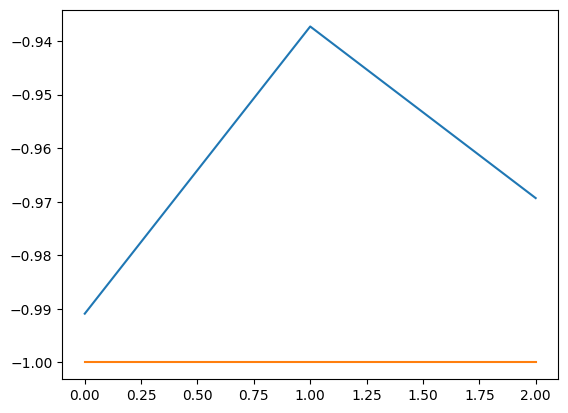

In [125]:
idx = 13

plt.plot(X[idx])
plt.plot(Y[idx])

In [130]:
model = sklearn.neural_network.MLPRegressor(
    hidden_layer_sizes=(10,),
    batch_size=n,
    shuffle=True,
    random_state=2025,
    solver="adam",
    max_iter=400,
)

Text(0.5, 1.0, 'Score: 0.9958222926265415')

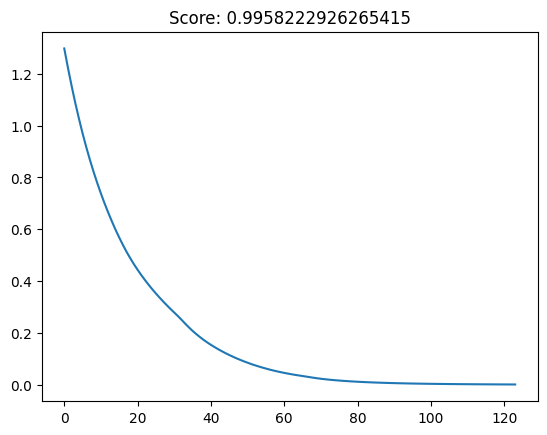

In [131]:
model.fit(X,Y)
plt.plot(model.loss_curve_)
plt.title(f'Score: {model.score(X,Y)}')

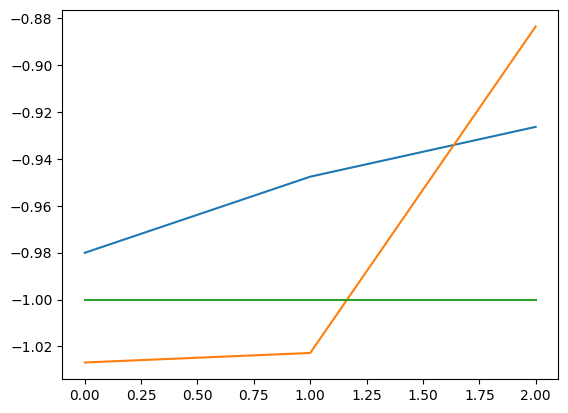

In [132]:
idx = 60

plt.plot(X[idx])
plt.plot(model.predict(X)[idx])
plt.plot(Y[idx])